In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir, path 

In [26]:
alg_output_folders = {
  "SPMST": "output_data-SPMST_ver3",
  "RSPH": "output_data-RSPH_ver2",
  "SPGA": "output_data-SPGA_ver1"
}
df = pd.DataFrame
for alg in alg_output_folders:
  for instype_csv in listdir(alg_output_folders[alg]):
    if instype_csv[-4:] == ".csv":
      tmp = pd.read_csv(alg_output_folders[alg] + "\\" + instype_csv)
      if df.empty:
        df = tmp
      else:
        df = df.append(tmp)
df

,Algorithm,Type,Instance,Seed,BF,Rs
0,SPMST,Type_1_Large,100rat783,0,44220,3.446202
1,SPMST,Type_1_Large,100rat783,1,44220,3.586315
2,SPMST,Type_1_Large,100rat783,2,44220,3.845333
3,SPMST,Type_1_Large,100rat783,3,44220,3.516564
4,SPMST,Type_1_Large,100rat783,4,44220,3.896075
...,...,...,...,...,...,...
445,SPGA,Type_1_Small,75lin105,25,1386,25.988790
446,SPGA,Type_1_Small,75lin105,26,1386,23.460882
447,SPGA,Type_1_Small,75lin105,27,1386,24.816892
448,SPGA,Type_1_Small,75lin105,28,1386,25.698840


In [27]:
instypes = {}
for t in df.Type.unique():
  instypes[t] = df.loc[df.Type == t].Instance.unique()

instypes

{'Type_1_Large': array(['100rat783', '10a280', '10gil262', '10lin318', '10pcb442',
        '10pr439', '150rat783', '25a280', '25gil262', '25lin318',
        '25pcb442', '25pr439', '50a280', '50gil262', '50lin318',
        '50pcb442', '50pr439', '50rat783'], dtype=object),
 'Type_1_Small': array(['10berlin52', '10eil51', '10eil76', '10kroB100', '10pr76',
        '10rat99', '10st70', '15berlin52', '15eil51', '15eil76', '15pr76',
        '15st70', '25eil101', '25kroA100', '25lin105', '25rat99',
        '50eil101', '50kroA100', '50kroB100', '50lin105', '50rat99',
        '5berlin52', '5eil51', '5eil76', '5pr76', '5st70', '75lin105'],
       dtype=object),
 'Type_2': array(['10C1k.0', '10C1k.1', '10C1k.2', '10C1k.3', '10C1k.4', '10C1k.5',
        '10C1k.6', '10C1k.7', '10C1k.8', '10C1k.9'], dtype=object),
 'Type_3_Large': array(['20i550', '20i600', '20i650', '20i700', '25i750', '25i850',
        '25i900', '30i1000', '30i950', '6i300', '6i350', '6i400', '6i450',
        '6i500'], dtype=objec

In [28]:
best = {}
for insname in df.Instance.unique():
  best[insname] = min(df.BF[insname == df.Instance])

df['Best'] = [best[row.Instance] for index, row in df.iterrows()]
df['RPD'] = (df['BF'] - df['Best']) * 100 / df['Best']
df.dropna(subset=["RPD"], inplace=True)
df

,Algorithm,Type,Instance,Seed,BF,Rs,Best,RPD
0,SPMST,Type_1_Large,100rat783,0,44220,3.446202,1393,3074.443647
1,SPMST,Type_1_Large,100rat783,1,44220,3.586315,1393,3074.443647
2,SPMST,Type_1_Large,100rat783,2,44220,3.845333,1393,3074.443647
3,SPMST,Type_1_Large,100rat783,3,44220,3.516564,1393,3074.443647
4,SPMST,Type_1_Large,100rat783,4,44220,3.896075,1393,3074.443647
...,...,...,...,...,...,...,...,...
445,SPGA,Type_1_Small,75lin105,25,1386,25.988790,1386,0.0
446,SPGA,Type_1_Small,75lin105,26,1386,23.460882,1386,0.0
447,SPGA,Type_1_Small,75lin105,27,1386,24.816892,1386,0.0
448,SPGA,Type_1_Small,75lin105,28,1386,25.698840,1386,0.0


<AxesSubplot:xlabel='Type', ylabel='RPD'>

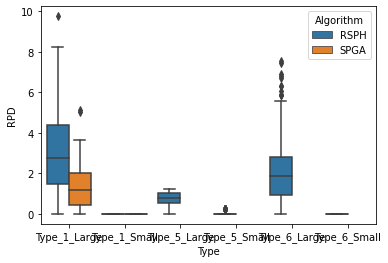

In [29]:
sns.boxplot(x = 'Type', y = 'RPD', data = df[df.Algorithm != "SPMST"], hue = 'Algorithm')

In [30]:
# Calculate BF and AVG of each algorithm on each instance
instances = df.Instance.unique()
algorithms = df.Algorithm.unique()
columns = []
for alg in algorithms:
  columns.append(alg + "_BF")
  columns.append(alg + "_AVG")

print(columns)

arr = [[0 for alg in columns] for i in instances]
for i in range(len(instances)):
  ins = instances[i]
  for j in range(len(columns)):
    alg = columns[j].split("_")[0]
    op = columns[j].split("_")[1]
    tmp = df.loc[(alg == df.Algorithm) & (ins == df.Instance)].BF
    if op == "BF":
      arr[i][j] = 0 if len(tmp) == 0 else min(tmp)
    else:
      arr[i][j] = 0 if len(tmp) == 0 else sum(tmp)/len(tmp)

df2 = pd.DataFrame(np.array(arr), columns=columns, index=instances)
df2

['SPMST_BF', 'SPMST_AVG', 'RSPH_BF', 'RSPH_AVG', 'SPGA_BF', 'SPGA_AVG']


,SPMST_BF,SPMST_AVG,RSPH_BF,RSPH_AVG,SPGA_BF,SPGA_AVG
100rat783,44220.0,44220.0,1393.0,1417.400000,0.0,0.000000
10a280,8901.0,8901.0,742.0,751.700000,739.0,744.000000
10gil262,7324.0,7324.0,755.0,763.700000,755.0,755.566667
10lin318,8738.0,8738.0,682.0,691.933333,680.0,690.400000
10pcb442,10846.0,10846.0,626.0,635.733333,0.0,0.000000
...,...,...,...,...,...,...
9eil101-3x3,3637.0,3637.0,891.0,891.000000,0.0,0.000000
9eil51-3x3,4140.0,4140.0,863.0,863.000000,0.0,0.000000
9eil76-3x3,3334.0,3334.0,857.0,857.000000,0.0,0.000000
9pr76-3x3,4583.0,4583.0,900.0,900.000000,0.0,0.000000


SyntaxError: invalid syntax (<ipython-input-31-eaf083cb72bb>, line 1)

In [ ]:
df2["PI_SPGA_SPMST"] = (df2["SPMST_AVG"] - df2["SPGA_AVG"]) / df2["SPGA_AVG"] * 100
df2["PI_SPGA_RSPH"] = (df2["RSPH_AVG"] - df2["SPGA_AVG"]) / df2["SPGA_AVG"] * 100
df2

,SPMST_BF,SPMST_AVG,RSPH_BF,RSPH_AVG,SPGA_BF,SPGA_AVG,PI_SPGA_SPMST,PI_SPGA_RSPH
100rat783,44220.0,44220.0,0.0,0.000000,0.0,0.000000,inf,NaN
10a280,8901.0,8901.0,747.0,753.333333,739.0,744.000000,1096.370968,1.254480
10gil262,7324.0,7324.0,755.0,763.833333,755.0,755.566667,869.338686,1.094102
10lin318,8738.0,8738.0,682.0,691.433333,680.0,690.400000,1165.643105,0.149672
10pcb442,10846.0,10846.0,0.0,0.000000,0.0,0.000000,inf,NaN
...,...,...,...,...,...,...,...,...
9eil101-3x3,3637.0,3637.0,0.0,0.000000,0.0,0.000000,inf,NaN
9eil51-3x3,4140.0,4140.0,0.0,0.000000,0.0,0.000000,inf,NaN
9eil76-3x3,3334.0,3334.0,0.0,0.000000,0.0,0.000000,inf,NaN
9pr76-3x3,4583.0,4583.0,0.0,0.000000,0.0,0.000000,inf,NaN


In [ ]:
which_pi = "PI_SPGA_RSPH"
ordered_types = ["Type_1_Small", "Type_5_Small", "Type_6_Small", "Type_1_Large", "Type_2", "Type_3_Large", "Type_5_Large", "Type_6_Large"]
arr = []
for i in ordered_types:
  instances = instypes[i]
  tmp = df2.loc[instances][which_pi].dropna()
  if len(tmp) > 0:
    arr.append([min(tmp), sum(tmp) / len(tmp), max(tmp), str(sum(1 for pi in tmp if pi > 0)) + "/" + str(len(tmp))])
  else:
    arr.append([0, 0, 0, "0/0"])

dfpi = pd.DataFrame(arr, columns=["Minimum PI", "Average PI", "Maximum PI", "Better"], index=ordered_types)
dfpi

,Minimum PI,Average PI,Maximum PI,Better
Type_1_Small,0.000000,0.00000,0.000000,0/15
Type_5_Small,0.000000,0.00000,0.000000,0/0
Type_6_Small,0.000000,0.00000,0.000000,0/0
Type_1_Large,0.149672,2.31761,4.620603,10/10
Type_2,0.000000,0.00000,0.000000,0/0
Type_3_Large,0.000000,0.00000,0.000000,0/0
Type_5_Large,0.000000,0.00000,0.000000,0/0
Type_6_Large,0.000000,0.00000,0.000000,0/0
